# Regresión Lineal con Gradiente decendente

### Integrantes:
* Yesid Rosas Toro
* Samara Rincon Montaña
* Cristian Camilo Quiceno Laurente

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.io as sio

Dada la siguiente $t$:

In [2]:
data = sio.loadmat('Datasets/ejemplo_regresion.mat')
t = data['t'].T[0]

1- Realice un gráfico del 0 al 1 que enseñe el comportamiento del vecto $t$ (0.1).

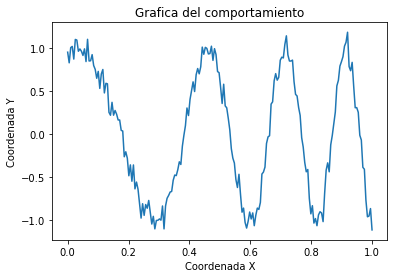

In [3]:
x = np.linspace(0, 1, len(t))
y = np.array(t)

plt.title("Grafica del comportamiento")
plt.plot(x, y)

plt.xlabel("Coordenada X")
plt.ylabel("Coordenada Y")

plt.show()

2- Usando mínimos cuadrados desarrolle para cada una de las tres de funciones base una solución que se ajuste a la señal mostrada en el punto anterior. Defina los valores de $m$ y $s$ en cada uno de los tres casos. Realice un gráfico comparativo para cada $\hat{t}$ vs t, y uno final de todas las $\hat{t}$s vs t. Muestré los errores de cada $\hat{t}$. Use subplot. ¿Que puede intepretar de los resultados? (1.0)

In [4]:
def polinomial(xp, yp):
    return xp ** yp

def exponencial(xe, ue):
    return np.exp(-(((xe-ue)**2)/(2*((0.07)**2))))

def sigmoidal (xs, us):
    return (1)/(1+np.exp(-((xs-us)/0.01)))

In [5]:
def generarPhi(x, m, fn):
    phi = np.ones((len(x), len(m)))
    
    for i in range(len(x)):
        for j in range(1, len(m)):
            phi[i][j] = fn(x[i], m[j])
    
    return phi

def generarW(phi, x):
    w = np.linalg.inv(phi.T @ phi) @ phi.T @ x
    return w

def error_medio(r, p):
    error = ((r - p)**2).mean() / 2
    return error

In [6]:
funciones = [polinomial, exponencial, sigmoidal]
etiquetas = ["polinomial", "exponencial", "sigmoidal"]

ms = [20, 15, 25]

errores = [0., 0., 0.]
tPrimas = [[], [], []]

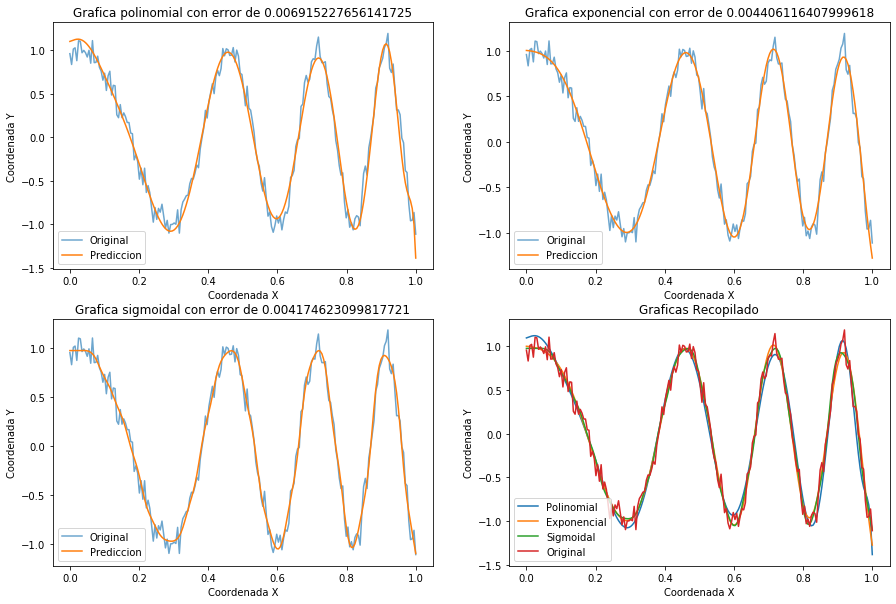

In [7]:
plt.subplots(2,2,figsize=(15,10))

for i in range(3):
    m = ms[i]
    fn = funciones[i]
    
    if fn == polinomial:
        v = np.arange(m)
    else:
        v = np.linspace(0, 1, m)

    phi = generarPhi(x, v, fn)
    w = generarW(phi, t)

    tPrimas[i] = phi @ w

    errores[i] = error_medio(t, tPrimas[i])

    plt.subplot(2, 2, i+1)

    plt.title("Grafica {} con error de {}".format(etiquetas[i], errores[i]))
    plt.xlabel("Coordenada X")
    plt.ylabel("Coordenada Y")

    plt.plot(x, t, alpha=0.65)
    plt.plot(x, tPrimas[i])

    plt.legend(['Original', 'Prediccion'])

# Todas

plt.subplot(2, 2, 4)

plt.title("Graficas Recopilado")
plt.xlabel("Coordenada X")
plt.ylabel("Coordenada Y")

plt.plot(x, tPrimas[0])
plt.plot(x, tPrimas[1])
plt.plot(x, tPrimas[2])
plt.plot(x, t)
    
plt.legend(['Polinomial','Exponencial','Sigmoidal', 'Original'])


plt.show()

3- Ahora defina una función para calcular el gradiente. Recuerde que el gradiente se genera con base a la derivada de la función: 

* $E(w) = \frac{1}{2N} \sum_{n=1}^{N} (y(x_{n},w)-t_{n})^{2}$

La derivada parcial con respecto a $w_{j}$ sería:

* $\Delta = \frac{1}{N} \sum_{n=1}^{N} (y(x_{n},w)-t_{n}) * x_{j}$.

Donde $j$ representa cada una de las características. (0.5)

In [8]:
def calcularGradiente(w, a, phi, y, t):
    diff = y - t
    
    for i in range(len(w)):
        dp = derivadaParcial(phi, i, diff)
        w[i] = w[i] - (a * dp)
        
    return w

def derivadaParcial(phi, i, diff):
    return np.mean(diff @ phi.T[i])

4- Ahora programa una función que reciba los siguiente parámetros:

- $\phi$ 
- $t$
- $m$
- El error esperado

Esta función debe calcular $w$ y $\hat{t}$ hasta que el error sea menor al error esperado. Recuerde que la ecuación para calcular $w$ esta dada por:

$w_{j} = w_{j} - \alpha \Delta$

Use un $\alpha$ de $0.0002$. Defina un máximo de iteraciones en 100k.

Retorne $\hat{t}$, el número de iteraciones y el error obtenido. (1.2) 

In [9]:
def entrenar(phi, t, m, err_esperado):
    n = 0
    a = 0.0002
    
    w = np.ones(m)
    y = phi @ w

    error = error_medio(t, y)
    err_relativo = 1

    while err_relativo > 0.075 and n < 100000:
        w = calcularGradiente(w, a, phi, y, t)
        y = phi @ w
        
        error = error_medio(t, y)
        err_relativo = error_relativo(err_esperado, error)
        n += 1
        
    return y, n, error

def error_relativo(real, aprox):
    return abs((real - aprox) / real)

5- Usando las funciones base con los mismos $m$ que definió en el punto $2$ y la función del punto anterior, calcule $\hat{t}$ y responda 

¿Cuantas iteraciones tomó para el calculo de $w$?. 
¿Qué tan cerca quedo del $w$ generado con mínimos cuadrados?

Grafique los resultados obtenido realizando la comparación de t y $\hat{t}$. Muestre el número de interaciones y el error. (1.0)

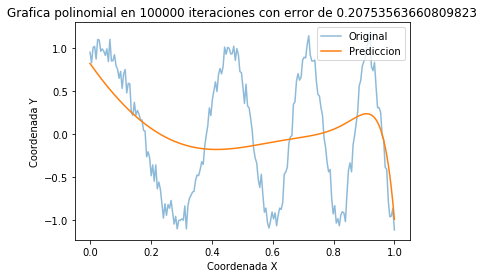

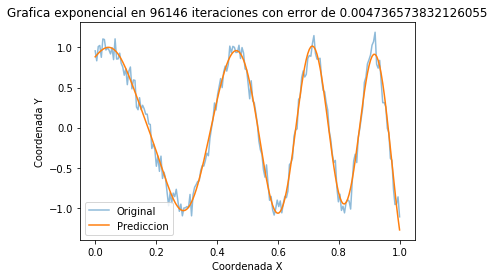

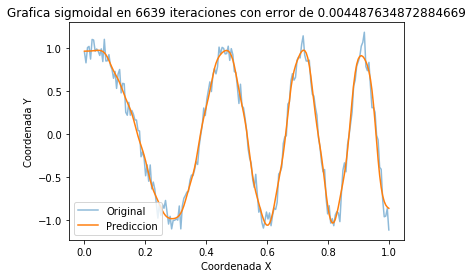

In [10]:
for i in range(3):
    m = ms[i]
    fn = funciones[i]
    
    if i == 0:
        v = np.arange(m)
    else:
        v = np.linspace(0, 1, m)

    phi = generarPhi(x, v, fn)

    (y, n, error) = entrenar(phi, t, m, errores[i])

    plt.title("Grafica {} en {} iteraciones con error de {}".format(etiquetas[i], n, error))
    plt.xlabel("Coordenada X")
    plt.ylabel("Coordenada Y")

    plt.plot(x, t, alpha=0.5)
    plt.plot(x, y)

    plt.legend(['Original', 'Prediccion'])

    plt.show()

6- Desarolle un función para normalizar Phi. Debe recibir como parámetro Phi y devolver Phi normalizada. (0.4)

In [11]:
def normalizar(phi):
    for i in range(1, phi.shape[1]):
        phi[:,i] = (phi[:,i] - np.mean(phi[:,i])) / np.std(phi[:,i])
    return phi

7- Ahora haga el mismo ejercicio del punto 5 pero ahora con $\phi$ normalizada. Compare las iteraciones, el error y $w$. Que puede intepretar de los resultados. (0.8)

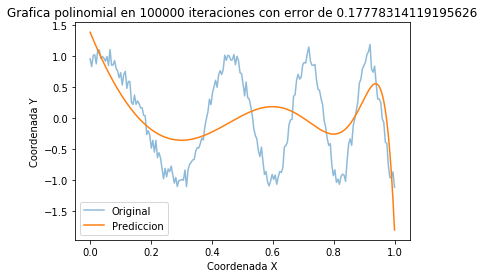

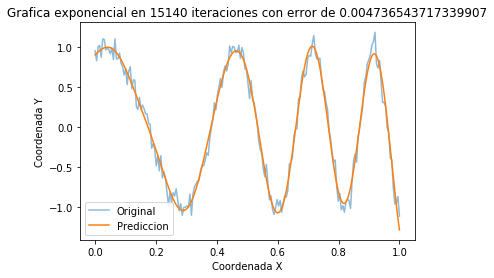

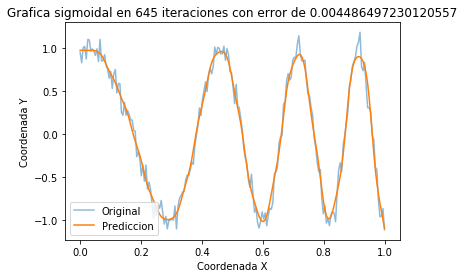

In [12]:
for i in range(3):
    m = ms[i]
    fn = funciones[i]
    
    if i == 0:
        v = np.arange(m)
    else:
        v = np.linspace(0, 1, m)

    phi = generarPhi(x, v, fn)
    phi = normalizar(phi)

    (y, n, error) = entrenar(phi, t, m, errores[i])

    plt.title("Grafica {} en {} iteraciones con error de {}".format(etiquetas[i], n, error))
    plt.xlabel("Coordenada X")
    plt.ylabel("Coordenada Y")

    plt.plot(x, t, alpha=0.5)
    plt.plot(x, y)

    plt.legend(['Original', 'Prediccion'])

    plt.show()